# Machine Learning Lab
## Lab 6 - Logistic Regression
---
**Shyam Sundaram<br>
19BCE1560<br>
September 6, 2021<br><br>
Abdul Quadir Md<br>
L31+L32**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sb

# The Data
---
## The Banknote Authentication Dataset

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

## Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer):
    - 1: Forged
    - 0: Authentic

In [2]:
data = pd.read_csv("data_banknote_authentication.csv",header=None)
data.columns=['Variance','Skewness','Curtosis','Entropy','Class']
data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


The cells below show a tally of how many notes are forged and are real in the dataset.

In [4]:
data[data['Class']==1].count()

Variance    610
Skewness    610
Curtosis    610
Entropy     610
Class       610
dtype: int64

In [5]:
data[data['Class']==0].count()

Variance    762
Skewness    762
Curtosis    762
Entropy     762
Class       762
dtype: int64

# Visualising the Dataset
---

## Pairplot

To check the linearity among attributes.

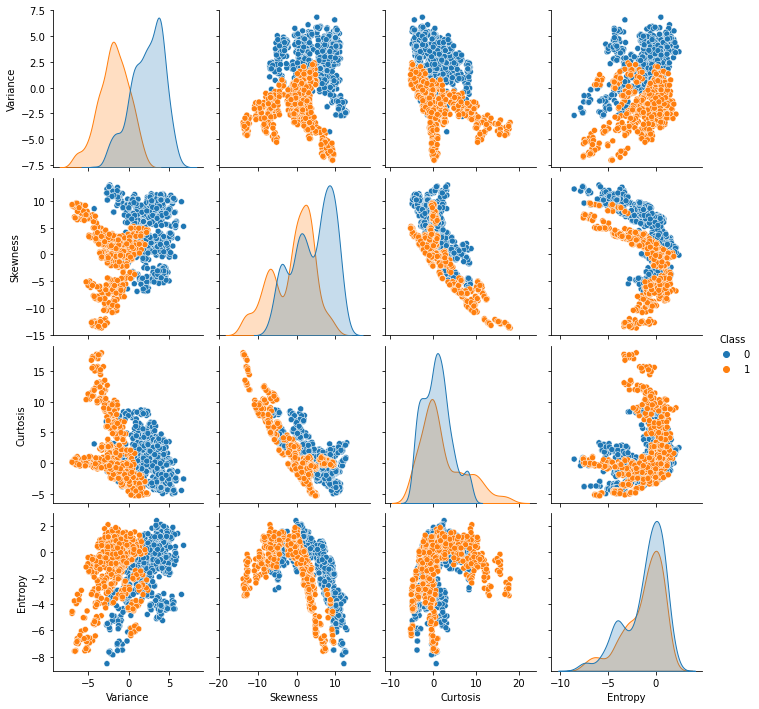

In [6]:
sb.pairplot(data,hue="Class")

## Correlation Heatmap

<AxesSubplot:>

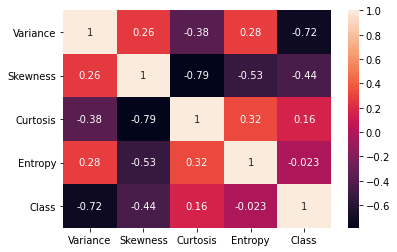

In [7]:
corr=data.corr()
sb.heatmap(corr,annot=True)

# Missing Values
---

In [8]:
data.isnull()

,Variance,Skewness,Curtosis,Entropy,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1367,False,False,False,False,False
1368,False,False,False,False,False
1369,False,False,False,False,False
1370,False,False,False,False,False


In [9]:
data.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

There are no missing values.

# Split target from attributes
---

In [10]:
X=data.drop('Class',axis=1)
y=data['Class']
print(X)
print(y)

      Variance  Skewness  Curtosis  Entropy
0      3.62160   8.66610   -2.8073 -0.44699
1      4.54590   8.16740   -2.4586 -1.46210
2      3.86600  -2.63830    1.9242  0.10645
3      3.45660   9.52280   -4.0112 -3.59440
4      0.32924  -4.45520    4.5718 -0.98880
...        ...       ...       ...      ...
1367   0.40614   1.34920   -1.4501 -0.55949
1368  -1.38870  -4.87730    6.4774  0.34179
1369  -3.75030 -13.45860   17.5932 -2.77710
1370  -3.56370  -8.38270   12.3930 -1.28230
1371  -2.54190  -0.65804    2.6842  1.19520

[1372 rows x 4 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64


# MinMax Scaler applied
---

In [11]:
from sklearn import preprocessing

In [12]:
minmax=preprocessing.MinMaxScaler()

In [13]:
X=minmax.fit_transform(X)
X

array([[0.76900389, 0.83964273, 0.10678269, 0.73662766],
       [0.83565902, 0.82098209, 0.12180412, 0.64432563],
       [0.78662859, 0.41664827, 0.31060805, 0.78695091],
       ...,
       [0.23738543, 0.01176814, 0.98560321, 0.52475518],
       [0.25084193, 0.20170105, 0.76158701, 0.6606745 ],
       [0.32452819, 0.49074676, 0.34334762, 0.88594888]])

In [14]:
y=y.values

# Split train and test data
---

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.30, random_state=42)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(960, 4)
(960,)
(412, 4)
(412,)


# Train Regression Model
---

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
LogReg = LogisticRegression()

In [19]:
LogReg.fit(train_x,train_y)

LogisticRegression()

In [20]:
LogReg.coef_

array([[-9.74269185, -7.08979338, -6.27239663,  0.17280531]])

In [21]:
LogReg.intercept_

array([10.64420107])

# Making predictions
---

## On test Data

In [22]:
pred=LogReg.predict(test_x)

In [23]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,

In [24]:
test_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,

In [25]:
from sklearn import metrics
metrics.accuracy_score(test_y,pred)

0.9684466019417476

In [26]:
metrics.confusion_matrix(test_y,pred)

array([[223,   6],
       [  7, 176]], dtype=int64)

## On the whole dataset

In [27]:
X2=data.values[:,0:4]
X2

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [28]:
data['Predicted_Class']=LogReg.predict(X2)
data

,Variance,Skewness,Curtosis,Entropy,Class,Predicted_Class
0,3.62160,8.66610,-2.8073,-0.44699,0,0
1,4.54590,8.16740,-2.4586,-1.46210,0,0
2,3.86600,-2.63830,1.9242,0.10645,0,0
3,3.45660,9.52280,-4.0112,-3.59440,0,0
4,0.32924,-4.45520,4.5718,-0.98880,0,1
...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1,1
1368,-1.38870,-4.87730,6.4774,0.34179,1,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1,1


# Evaluating the model
---

## Accuracy

In [29]:
metrics.accuracy_score(data['Class'],data['Predicted_Class'])

0.9737609329446064

## Precision

In [30]:
metrics.accuracy_score(data['Class'],data['Predicted_Class'])

0.9737609329446064

## Recall

In [31]:
metrics.recall_score(data['Class'],data['Predicted_Class'])

0.9590163934426229

## Confusion Matrix

In [32]:
metrics.confusion_matrix(data['Class'],data['Predicted_Class'])

array([[751,  11],
       [ 25, 585]], dtype=int64)